# 推測統計
推測統計では、標本ではなく母集団に興味がある<br>
→記述統計は、取得できた標本に興味がある

In [1]:
# ライブラリのインストール
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns

/var/folders/q5/s5mcbmt95hd29sp3b9xmr2580000gn/T/ipykernel_86536/3030058279.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# 使用するデータのロード
df = sns.load_dataset("tips")
df["tip_rate"] = df["tip"] / df["total_bill"]  ## 支払に対するチップの割合
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 標本分布
* 標本分布の中身は確率的に変動する
* 標本統計量も同様に確率的に変動する値(つまり確率変数)
* 標本統計量が従う確率分布を標本分布と呼ぶ

## 推定量
* 母数の推定に使う標本統計量
* 実際の値を推定値という

## 不偏性(unbiasedness)
* 推定量が"平均的に"母数と一致する場合、その推定量は「不偏性がある」という
* 普遍性がある推定量を、不偏推定量(unbiased estimator)と呼ぶ
* 確率の文脈では、平均のことを期待値という

## 大数の法則
* 標本平均と母集団平均の間の関係
* サンプルサイズ$n$を大きくすると、標本平均$\bar{x}$が、母平均$\mu$に限りなく近づく

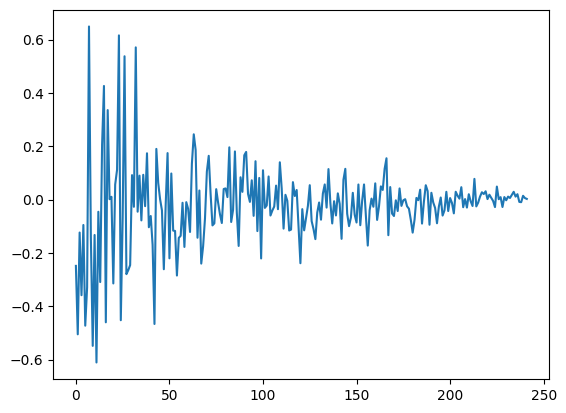

In [54]:
# 大数の法則の確認
# サンプルサイズを2〜244まで増やしていき、その際の標本誤差を調べる
sampled_average_list = []
for n in range(len(df) - 2):
    sampled_average_list.append(df["tip"].sample(n + 2).mean())


def get_error(sampled, df, column):
    mu = df[column].mean()
    return sampled - mu


y = get_error(sampled_average_list, df, "tip")
plt.plot(y)

## 平均の標本分布
* 平均の標本分布の平均は、母平均と同じ$\mu$になる
* 平均の標本分布の分散は、母分散を$n$で割った値($\sigma^2/n$)になる

In [50]:
# 元データの平均と分散をあらかじめみておく
print(f"母平均:{df['tip'].mean()}")
print(f"母分散:{df['tip'].var()}")
sigma = df["tip"].var()

母平均:2.99827868852459
母分散:1.914454638062471


In [51]:
sampled_average_list = []
n = 50
for _ in range(1000):
    sampled_average_list.append(df["tip"].sample(n).mean())
print(f"標本平均の平均:{np.mean(sampled_average_list)}")
print(f"標本平均の分散:{np.var(sampled_average_list)}")
print(f"分散を近似値で計算：{sigma/n}")

標本平均の平均:3.0077128
標本平均の分散:0.030816415916160002
分散を近似値で計算：0.03828909276124942


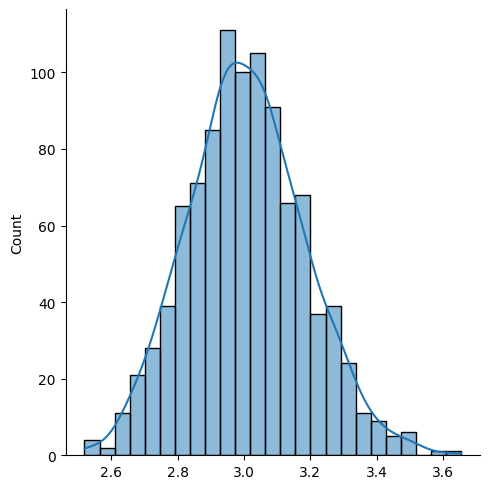

In [53]:
sns.displot(sampled_average_list, kde=True)

## 不偏分散
* 特徴
  * 母分散の不偏推定量
  * 不偏分散は、分散の式に置いて、$n$ではなく、$n-1$で割った値
* 不偏分散の算出
  * stats.tvar(a)
  * np.var(a, ddof=1)

In [55]:
stats.tvar(df["tip"])

1.914454638062471

In [56]:
np.var(df["tip"], ddof=1)

1.914454638062471

In [57]:
np.var(df["tip"])

1.9066085124966412

## 不偏分散の平方根の不偏性
* 特徴
  * 不偏分散の平方根は母集団の標準偏差$\sigma$の不偏推定量にはならない
  * 不偏分散の平方根を「不偏標準偏差」と呼ぶのは間違い
* 不偏分散の平方根の算出
  * stats.tstd(a)
  * np.std(a, ddof=1)

In [58]:
stats.tstd(df["tip"])

1.3836381890011822

In [59]:
np.std(df["tip"], ddof=1)

1.3836381890011822

### 不偏分散の"不偏性"を確認してみよう
* データセットを母集団と見立てて、50個の標本を100回抽出して、標本の分散と不偏分散の平均がどうなるのか見てみよう

In [60]:
# 元データの平均と分散をあらかじめみておく
print(f"母平均:{df['tip'].mean()}")
print(f"母分散:{df['tip'].var()}")
sigma = df["tip"].var()

母平均:2.99827868852459
母分散:1.914454638062471


In [69]:
sampled_var_list = []
sampled_tvar_list = []
n = 50
for _ in range(1000):
    sampled_var_list.append(np.var((df["tip"].sample(n))))
    sampled_tvar_list.append(stats.tvar((df["tip"].sample(n))))
print(f"標本分散の平均: {np.mean(sampled_var_list)}")
print(f"不偏分散の平均: {np.mean(sampled_tvar_list)}")

標本分散の平均: 1.8748514552400002
不偏分散の平均: 1.890704379510204


# 推定

## 信頼区間
*  母数の値を区間を持って推定すること(ex. 母比率は0.5~0.7である)
*  区間とともに確度をつける(ex. 95%の確度で母比率は0.5~0.7である)
*  この区間を信頼区間(CI: confidence interval)という

### 比率の区間推定
* 特徴
  * 標本の比率の値から母集団の比率の値を推定する
  * 実際に比率の区間推定が応用されている例は多い(選挙速報, 内閣支持率, 視聴率, etc....)
* Pythonでの算出
  * stats.binom.interval(alpha, n, p)
  * 戻り値は、n個のときにどの範囲になるか

In [5]:
# サンプルサイズ1000の標本から、標本比率0.6(p)となったとき、母比率の95%信頼区間を求める
stats.binom.interval(0.95, 1000, 0.6)

(570.0, 630.0)

### Challenge
* データセットを母集団と見立てて、50個の標本比率から母比率を区間推定しよう
* これを100回繰り返して、何回正しく推定できるのかをみてみよう

In [11]:
# 母集団と見立てたデータセットの母比率を先にみておく
df["sex"].value_counts(normalize=True)

sex
Male      0.643443
Female    0.356557
Name: proportion, dtype: float64

In [36]:
# 母集団からサンプルサイズ50の標本を抽出し、標本比率を計算
# それが、母比率を含んでいるかどうかをチェック
# これを100回繰り返す
column = "sex"
target = "Male"
alpha = 0.95
n = 50
population_male_ratio = df[column].value_counts(normalize=True)[target]
sampled_ratio = []
ci_list = []
ci_results = []

for _ in range(100):
    sampled_male_ratio = df.sample(n)[column].value_counts(normalize=True)[target]
    ci = stats.binom.interval(alpha, n, sampled_male_ratio)
    # print(sampled_male_ratio, ci)
    ci_list.append(ci)
    # ciは、50人の場合の男性の人数で返されるので、比率に直してから比較
    min_ratio = ci[0] / n
    max_ratio = ci[1] / n
    check = min_ratio <= population_male_ratio and population_male_ratio <= max_ratio
    ci_results.append(check)
print(f"100回繰り返したときに95%区間に母比率が含まれていた回数: {sum(ci_results)}")

100回繰り返したときに95%区間に母比率が含まれていた回数: 97


### 平均値の区間推定
* 特徴
  * 標本の平均値から母集団の平均値を推定する
  * 実際に平均値の区間推定が応用されている例は多い(平均身長、平均年収、etc.)
* Pythonでの算出
  * stats.norm.interval(alpha, loc, scale)  (alpha: 信頼区間、loc: 標本平均、scale: 標本の不偏分散の平方根/ルートn)

### Challenge
* データセットを母集団と見立てて、50個の標本平均から母平均を区間推定しよう
* これを100回繰り返して、何回正しく推定できるのかをみてみよう

In [7]:
df["tip"].mean()

2.99827868852459

In [21]:
# 母集団からサンプルサイズ50の標本を抽出し、標本平均を計算
# それが、母平均を含んでいるかどうかをチェック
# これを100回繰り返す
column = "tip"
alpha = 0.95
n = 50
real_tip_avg = df[column].mean()
ci_list = []
ci_results = []

for _ in range(100):
    sampled_tip = df[column].sample(n)
    sampled_tip_avg = sampled_tip.mean()
    sampled_tip_tstd = stats.tstd(sampled_tip)
    ci = stats.norm.interval(alpha, sampled_tip_avg, sampled_tip_tstd / np.sqrt(n))
    ci_list.append(ci)
    # print(ci)
    min_val, max_val = ci
    check = min_val <= real_tip_avg and real_tip_avg <= max_val
    ci_results.append(check)
print(f"100回繰り返したときに95%区間に母平均が含まれていた回数: {sum(ci_results)}")

100回繰り返したときに95%区間に母平均が含まれていた回数: 93


## t分布
* 特徴
  * 母標準偏差$\sigma$の代わりに、不偏分散$s'^2$の平方根$s'$を使用することで変形した分布
  * 自由度(degree of feedom)$n-1$をパラメータにとる(nはサンプル数)
  * 標準正規分布に比べ、裾野が広くなる
  * $n$を大きくすると標準正規分布に近づく($n$が十分大きければ、標準正規分布に近似可能)
* Pythonでの算出
  * stats.t(df) (df: 自由度)

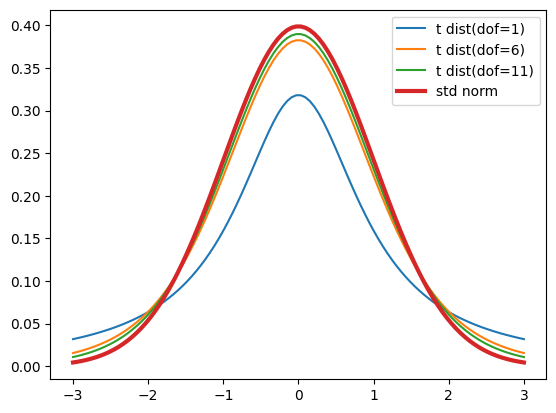

In [32]:
x = np.linspace(-3, 3, 100)
z = stats.norm.pdf(x)
for dof in range(1, 12, 5):
    t = stats.t(dof).pdf(x)
    plt.plot(x, t, label=f"t dist(dof={dof})")
plt.plot(x, z, label="std norm", linewidth=3)
plt.legend()

### Challenge
* データセットを母集団と見立てて、50個の標本平均から正規分布を使った母平均の区間推定と、t分布を使った母平均の区間推定をしよう
* 結果がどう異なるのか見てみよう
* 95%信頼区間とする
* t分布の信頼区間
  * stats.t.interval(alpha, loc, scale, df)

In [36]:
alpha = 0.95
column = "tip"
n = 50
poplulation_tip_avg = df[column].mean()
sampled_tip = df[column].sample(n)
sampled_tip_avg = sampled_tip.mean()
sampled_tip_tstd = stats.tstd(sampled_tip)
norm_val = stats.norm.interval(
    alpha, loc=sampled_tip_avg, scale=sampled_tip_tstd / np.sqrt(n)
)
t_val = stats.t.interval(
    alpha, loc=sampled_tip_avg, scale=sampled_tip_tstd / np.sqrt(n), df=n - 1
)
print(f"正規分布を使った母平均の区間推定: {norm_val}")
print(f"t分布を使った母平均の区間推定: {t_val}")

正規分布を使った母平均の区間推定: (2.580988042538698, 3.2598119574613027)
t分布を使った母平均の区間推定: (2.572396735968697, 3.2684032640313037)


# 統計的仮説検定
* 統計的に仮説が正しいかどうかを確かめる
* 意思決定を左右する重要な役割を果たす
* 様々な検定があるが、本講座では基本的な検定のみを扱う

## 帰無仮説と対立仮説
* 帰無仮説: 棄却することを狙っている
* 対立仮説: 成立することを狙っている

## 統計的仮説検定の流れ
1. 帰無仮説と対立仮説を立てる
2. 帰無仮説が正しいと仮定のもと、標本観察を行う(標本統計量を計算する)
3. 標本観察の結果が仮定もとでどのくらいの確率で起こるのかを調べて、帰無仮説を否定できるかを確認する(否定した場合、対立仮説が成立)

## 2群の比率差の検定(Z検定)
* 2群の比率に差があるのかを検定する
  * 例. 自社のwebサイトにおいて、新しい施策をしたことにより、クリック率が上がったかを確かめたい(A/Bテスト)
* あくまでも、**母数に差があるのか**を検定している
  * このテストの中では、今回とれたサンプルを見ているが、母集団の過去や未来閲覧されるであろうクリック率に差があるのかを検定している

### 帰無仮説と対立仮説(比率差の検定)
* 帰無仮説：「差はない」(**$p_1$=$p_2$**)
* 対立仮説：「従来施策のクリック率より新施策のクリック率のほうが高い」(**$p_1$<$p_2$**)
  * "差がある"($p_1$≠$p_2$)を対立仮説(両側検定)にすると、**新施策の方がクリック率が高い**とは言えなくなってしまう

### 標本観察
* 2つの標本から比率を計算し、**比率の差がどのような標本分布**になるかを考える
* 帰無仮説が正しいとした場合、得られた比率の差がどのくらいの確率で得られるかを考える

### 比率差の標本分布
* 比率の差 $\frac{x_1}{n_1}$- $\frac{x_2}{n_2}$の標本分布は、それぞれの比率の標本分布の平均の差と分散の和の正規分布になる
  * 平均$\mu$=$p_1$-$p_2$, 分散$\sigma^2$=$\frac{p_1q_1}{n_1}$+$\frac{p_2q_2}{n_2}$の正規分布

### 有意水準
* 帰無仮説を棄却する境目
* 「帰無仮説を正しいとすると、滅多に起きない確率」の基準を有意水準($\alpha$)という
  * 通常は、 $\alpha$=0.05もしくは、$\alpha$=0.01
* 検定統計量が有意水準以下の確率で得られる場合、帰無仮説を棄却する
* 帰無仮説が棄却された時、「統計的に有意である」という

### 標本分布の標準化
* 平均$\mu$=$p_1$-$p_2$, 分散$\sigma^2$=$\frac{p_1q_1}{n_1}$+$\frac{p_2q_2}{n_2}$の正規分布 を標準化する(平均を引いて、標準偏差で割る)
* $z$ = $\frac{\frac{x_1}{n_1}-\frac{x_2}{n_2}}{\sqrt{p(1-p)(\frac{1}{n_1}+\frac{1}{n_2})}}$が、標準正規分布 $N$(0,1)に従う<br>

→**母比率$p$は使えない**ので、標本から得られる推定値$\hat{p}$を考える

### 母集団の$p$の推定値$\hat{p}$を計算する
* **2つの標本を合わせた比率**を、母比率$p$の推定値$\hat{p}$とする
$$ \hat{p} = \frac{x_1+x_2}{n_1+n_2} $$

* 2つの標本を1つにまとめるのが無理矢理に見えるかもしれないが、「帰無仮説として$p_1=p_2$としているので、まとめたものを推定値として使おう」　という考え

### p値(probability value)
* 帰無仮説が正しいとした時に、その検定統計量が得られる確率をp値という
* すなわち $p$ < $\alpha$のとき、帰無仮説を棄却できる

### Pythonによる比率の差の検定
* statsmodels.stats.proportion.proportions_ztest(count, nobs, alternative)
  * count: 標本の中で実際に観察できた数
  * nobs(the number of observations): 標本の大きさ
  * alternative: "two-sided", "smaller", "larger"("smaller": p1<p2, "larger":p1>p2)
* 戻り値(タプル)
  * zstat(検定統計量)
  * p値

In [44]:
proportions_ztest([30, 33], [1000], alternative="smaller")

(-0.3840618481549573, 0.35046630388746547)

上記の結果は、p値が有意水準5％を下回らなかったので、帰無仮説を棄却できないという結果となる

## 連関の検定(カイ二乗検定)
* 内容
  * 2つのカテゴリ変数間に連関があるかを検定する
  * 帰無仮説には「連関がない(=独立)」
  * 対立仮説には「連関がある(=独立ではない)」　→　片側検定はない
* 実施方法
  * 帰無仮説(連関がない)を仮定した時に、カテゴリ変数間の$\chi^2$(カイ二乗)値がどのくらいの確率で得られるのかを考える
  * $\chi^2$値は、$\chi^2$分布に従う(独立なら0になる)

### $\chi^2$分布
* 自由度(degree of freedom)を唯一のパラメータにとる分布
* 自由度=($a$ - 1)($b$ - 1) ($a$行$b$列の分割表)
  * 自由度とは、自由に値を決められる数のこと
    * 「お酒を飲む」人数が決まれば自動的に「飲まない」人数が決まる
    * →a個値があれば、a-1個の値を自由に決められる(最後の1つは自動的に決まる)

### $\chi^2$の$p$値の求め方
* 帰無仮説が正しいとした場合の標本から計算された$\chi^2$が得られる確率
* 2変数が独立の関係にある場合は、$\chi^2$=0になり、この時$p$値=1
* $\chi^2$分布の右から確率を累積した値(右側の面積)

### Pythonによるカイ二乗検定
* chi2, p, dof, ex = stats.chi2_contingency(obs, correction=False)
  * obs: 観測度数
  * correction: イェイツの修正(通常はFalse)

In [3]:
obs = [[15, 5], [15, 65]]
stats.chi2_contingency(obs, correction=False)

Chi2ContingencyResult(statistic=24.107142857142858, pvalue=9.112167294252327e-07, dof=1, expected_freq=array([[ 6., 14.],
       [24., 56.]]))

### カイ二乗検定と比率差の検定
* 自由度1のカイ二乗検定は、比率さの検定と同じ

In [7]:
n = 50
sample_df1 = df.sample(n)
sample_df2 = df.sample(n)
count1 = sample_df1["time"].value_counts()["Dinner"]
count2 = sample_df2["time"].value_counts()["Dinner"]

In [8]:
# Z検定
proportions_ztest([count1, count2], [n, n], alternative="two-sided")

(0.6486581250966152, 0.5165593764787644)

In [11]:
sample1_freq = sample_df1["time"].value_counts().values
sample2_freq = sample_df2["time"].value_counts().values

In [13]:
# カイ二乗検定
stats.chi2_contingency([sample1_freq, sample2_freq], correction=False)

Chi2ContingencyResult(statistic=0.42075736325385693, pvalue=0.5165593764787638, dof=1, expected_freq=array([[34.5, 15.5],
       [34.5, 15.5]]))

## 2群の平均値差の検定(t検定)
* 最もよく出てくる検定
* t分布を使うので一般にt検定と呼ばれる
* 平均値差の検定には「対応がない」ものと「対応がある」ものがある
  * 対応なし
    * それぞれの標本は対応していない
    * ex. 実験Aと実験Bを行うが、それぞれ被験者は別
      * 母集団はAとBで二つと考える
      * 母集団の平均$\mu_A$と$\mu_B$に差があると言えるのか？を検定
  * 対応あり
    * それぞれの標本は対応している
    * ex. 投薬前後で血圧の差を見る。同じ人物(標本)で結果に差があるのかをみる
      * 母集団は1つ
      * 差の平均$\mu$はゼロではないと言えるのか？を検定

### t検定の仮説
* 帰無仮説と対立仮説は比率の差と同様
* 平均値差の標本分布を考える
  * 得られた$\bar{x_1}$ - $\bar{x_2}$がどのような確率で得られるかを考える

### 平均値差の標本分布(大標本の場合)
* $\bar{x_1}$の標本分布：平均$\mu_1$, 分散$\frac{\sigma_1^2}{n_1}$の正規分布
* $\bar{x_2}$の標本分布：平均$\mu_2$, 分散$\frac{\sigma_2^2}{n_2}$の正規分布
* 平均の差$\bar{x_1}$ - $\bar{x_2}$の標本分布は、**それぞれの平均の標本分布の平均の差と分散の和**になる
  * 平均$\mu$ = $\mu_1$ - $\mu_2$, 分散$\sigma^2$ = $\frac{\sigma_1^2}{n_1}$ + $\frac{\sigma_2^2}{n_2}$ の正規分布
  * ただ、母分散$\sigma_1^2$および$\sigma_2^2$は未知なので、それぞれの標本の不偏分散${s_1}'^2$, ${s_2}'^2$で代用する
  * 平均$\mu$ = $\mu_1$ - $\mu_2$, 分散$\sigma^2$ = $\frac{{s_1}'^2}{n_1}$ + $\frac{{s_2}'^2}{n_2}$ の正規分布

### 平均値差の標本分布(小標本の場合)
* 標本が小さい場合、母集団が正規分布でかつ2群の分散が等しい場合に限り、統計検定量はt分布になる
* 2つの母集団に共通な$\sigma_1^2$(=$\sigma_2^2$)の推定値
  * 2つの標本の全データ($n_1$+$n_2$)における平均からの偏差の二乗和を全体の自由度で割ったものを使う
$$
\frac{(n_1-1){s_1}'^2+(n_2-1){s_2}'^2}{n_1+n_2-2}
$$
* よって、$\bar{x_1}$ - $\bar{x_2}$の標本分布は、平均$\mu$=$\mu_1$-$\mu_2$, 分散$\hat{\sigma}^2$=$\frac{(n_1-1){s_1}'^2+(n_2-1){s_2}'^2}{n_1+n_2-2}$($\frac{1}{n_1}$+$\frac{1}{n_2}$)の分布

#### 標本分布の標準化
* 上記の標本分布を、平均$\mu$, 標準偏差$\hat{\sigma}$で割り標準化をすると、t分布になる

### Pythonによるt検定の実施
* スチューデントのt検定: stats.ttest_ind(a, b, equal_var=True)
* ウェルチのt検定: stats.ttest_ind(a, b, equal_var=False)
  * 第一戻り値はt値
  * 第二戻り値はp値
  * ※indはindependentの意味。対応なしの場合は2群が独立しているため

* Challenge
  * データセットを標本と見立てて、男女のチップ率の平均に差があるのかを、スチューデントのt検定および、ウェルチのt検定を使って検定してみよう

In [7]:
# データセットの準備
df_male = df[df["sex"] == "Male"]
df_female = df[df["sex"] == "Female"]

In [10]:
# 検定前に確認
print(df_male["tip_rate"].mean(), df_female["tip_rate"].mean())

0.15765054700429743 0.16649073632892478


<Axes: xlabel='sex', ylabel='tip_rate'>

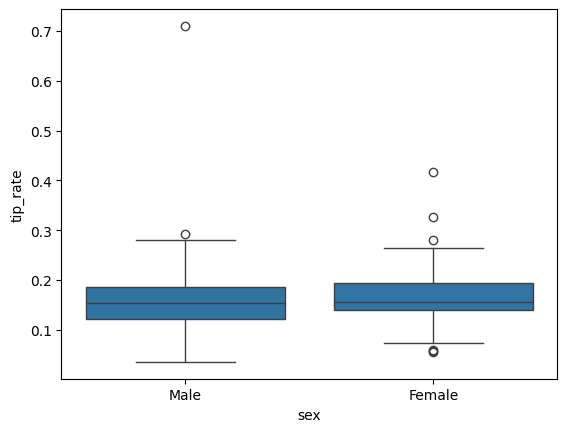

In [16]:
sns.boxplot(data=df, x="sex", y="tip_rate")

In [11]:
# スチューデントのt検定
stats.ttest_ind(df_male["tip_rate"], df_female["tip_rate"], equal_var=True)

TtestResult(statistic=-1.0833972270477996, pvalue=0.2797103849605489, df=242.0)

In [12]:
# ウェルチのt検定
stats.ttest_ind(df_male["tip_rate"], df_female["tip_rate"], equal_var=False)

TtestResult(statistic=-1.1432770167349968, pvalue=0.2542456188927583, df=206.75874799951296)